#  Optimization of Non-Differentiable Functions Using Differential Evolution

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates:
* Use of differential evolution to optimize Griewank's function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

For illustration, we optimize Griewank's function in 2 dimensions. The function is given by
\begin{equation*}
f(\boldsymbol{x}) = \frac{x_1^2+x_2^2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1
\end{equation*}
Note that Griewank's function is actually differentiable, however, the method works with _any_ function which may not necessary be differentiable.

In [3]:
# Griewank's function
def fun(x,y):
    value =  (x**2 + y**2)/4000.0 - np.cos(x)*np.cos(y/np.sqrt(2))+1
    return value

# vector-version of the function
vfun = np.vectorize(fun)

Plot the function as a heat map.

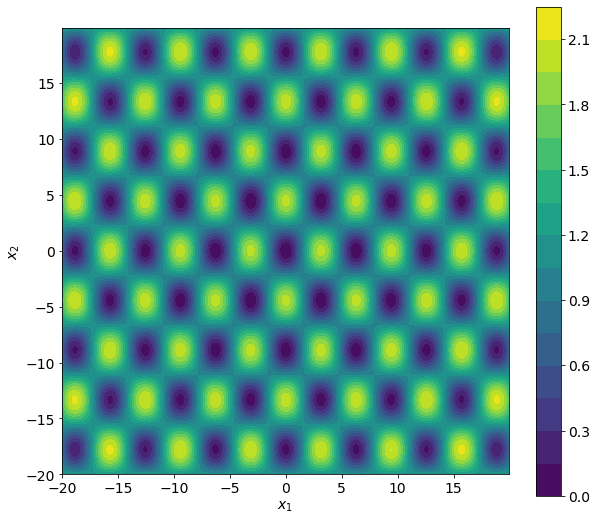

In [3]:
# plot map of Griewanks function
x = np.arange(-20.0, 20.0, 0.1)
y = np.arange(-20.0, 20.0, 0.1)
X, Y = np.meshgrid(x, y)

fZ = vfun(X,Y)

plt.figure(1,figsize=(10,9))
plt.rcParams.update({'font.size': 14})
plt.contourf(X,Y,fZ,levels=20)
plt.colorbar()
plt.axis('scaled')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Helper function to generate a random initial population of $D$ dimensions $N_P$ elements. The elementsof the population are randomly distributed in the interval $[x_{\min},x_{\max}]$ (in every dimension).

In [4]:
def initial_population(D, NP, xmin, xmax):
    v = np.random.rand(NP, D)*(xmax - xmin) + xmin
    return v

Carry out differential evolution similar (not identical, slightly modified) to the scheme DE1 described in [1]

[1] R. Storn and K. Price, "Differential Evolution - A simple and efficient adaptive scheme for global optimization
over continuous spaces", Technical Report TR-95-012, March 1995

In [5]:
#dimension
D = 2

# population
NP  = 15*D

# twiddling parameter
F = 0.8

# cross-over probability
CR = 0.3

# maximum 1000 iterations
max_iter = 1000


# generate initial population
population = initial_population(D, NP, -20, 20)[:]

# compute initial cost
cost = vfun(population[:,0], population[:,1])

best_index = np.argmin(cost)
best_cost = cost[best_index]

iteration = 0

# keep track of population 
save_population = []

while iteration < max_iter:
    # loop over every element from the population
    for k in range(NP):
        # get 4 random elements
        rp = np.random.permutation(NP)[0:4]
        
        # remove ourselves from the list
        rp = [j for j in rp if j !=  k]
        
        # generate new candidate vector
        v = population[rp[0],:] + F*( population[rp[1],:] - population[rp[2],:] ) 
        
        # take vector from population
        u = np.array(population[k,:])

        # cross-over each coordinate with probability CR with entry from candidate vector v
        idx = np.random.rand(D) < CR

        # cross-over
        u[idx] = v[idx]
        new_cost = fun(u[0], u[1])
        if new_cost < cost[k]:
            # better cost? keep!
            cost[k] = new_cost
            population[k,:] = u
            
            
            if new_cost < best_cost:
                best_cost = new_cost
                best_index = k
    
    save_population.append(np.array(population[:]))
    iteration += 1
    if iteration % 100 == 0:
        print('After iteration %d, best cost %1.4f (obtained for (%1.2f,%1.2f))' % (iteration, best_cost, population[best_index,0], population[best_index,1]))
                

After iteration 100, best cost 0.0122 (obtained for (-3.16,4.30))
After iteration 200, best cost 0.0001 (obtained for (0.01,0.01))
After iteration 300, best cost 0.0000 (obtained for (-0.00,-0.00))
After iteration 400, best cost 0.0000 (obtained for (0.00,-0.00))
After iteration 500, best cost 0.0000 (obtained for (0.00,-0.00))
After iteration 600, best cost 0.0000 (obtained for (0.00,-0.00))
After iteration 700, best cost 0.0000 (obtained for (0.00,-0.00))
After iteration 800, best cost 0.0000 (obtained for (0.00,-0.00))
After iteration 900, best cost 0.0000 (obtained for (0.00,-0.00))
After iteration 1000, best cost 0.0000 (obtained for (0.00,-0.00))


Generate animation.

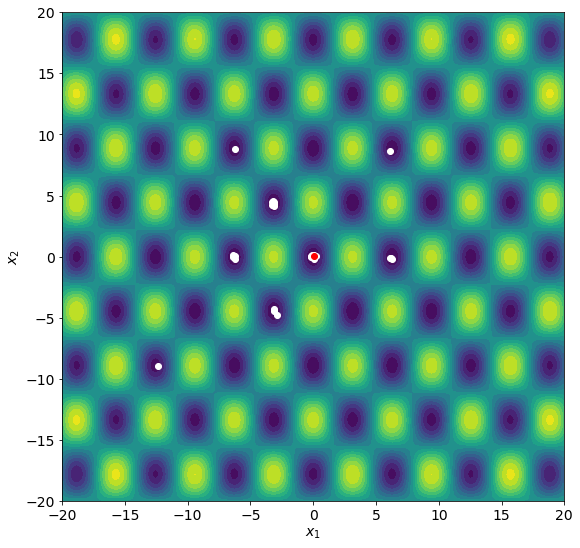

In [23]:
plt.figure(1,figsize=(9,9))
plt.rcParams.update({'font.size': 14})
plt.contourf(X,Y,fZ,levels=20)

index = 180
cost = vfun(save_population[index][:,0], save_population[index][:,1])
best_index = np.argmin(cost)
    
plt.scatter(save_population[index][:,0], save_population[index][:,1], c='w')
plt.scatter(save_population[index][best_index,0], save_population[index][best_index,1], c='r')
    
plt.xlim((-20,20))
plt.ylim((-20,20))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig('DE_Griewangk.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


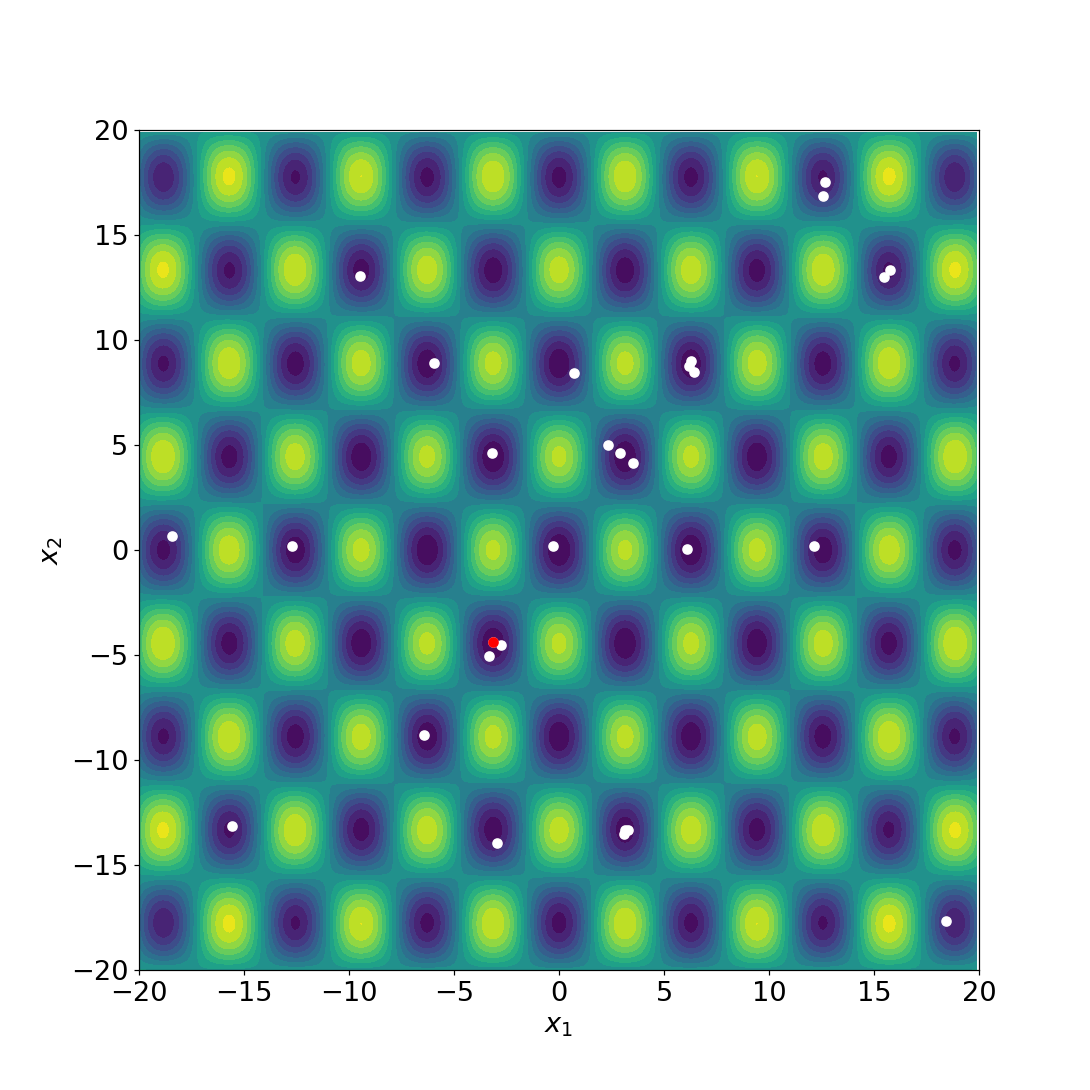

In [6]:
%matplotlib notebook
# Generate animation
from matplotlib import animation, rc
from matplotlib.animation import PillowWriter # Disable if you don't want to save any GIFs.

font = {'size'   : 18}
plt.rc('font', **font)

fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_xlim(( -20, 20))
ax.set_ylim(( -20, 20))
ax.axis('scaled')

written = False
def animate(i):
    ax.clear()

    ax.contourf(X,Y,fZ,levels=20)
        
    cost = vfun(save_population[i][:,0], save_population[i][:,1])

    best_index = np.argmin(cost)
    
    ax.scatter(save_population[i][:,0], save_population[i][:,1], c='w')
    ax.scatter(save_population[i][best_index,0], save_population[i][best_index,1], c='r')
    ax.set_xlabel(r'$x_1$',fontsize=18)
    ax.set_ylabel(r'$x_2$',fontsize=18)
    ax.set_xlim(( -20, 20))
    ax.set_ylim(( -20, 20))

    
anim = animation.FuncAnimation(fig, animate, frames=300, interval=80, blit=False)
fig.show()
anim.save('differential_evolution_Griewank.gif', writer=PillowWriter(fps=7))